# QRコード生成テスト

* バージョンごとのQRを生成してみる
  * qrcode パッケージを使用
* QRコードにして画像(png)で保存






In [ ]:
# ライブラリをインストール
#!pip install pillow
!pip install "qrcode[pil]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 事前に Google Drive へ接続しておく
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## バイナリ配列をQRコードにしてPNG画像で出力する
def make_qr_png(bin_data, dst_path, version=10):
  qr = qrcode.QRCode(
      version=version,
      error_correction=qrcode.constants.ERROR_CORRECT_M,
      box_size=2,
      border=2,
  )
  # バージョン１０を指定しているが、入力データ量が多いと自動的に上位バージョンで生成される

  qr.add_data(bin_data) # バイナリデータも入力できる！
  qr.make(fit=True)
  img = qr.make_image()
  img.save(dst_path)
  print("output QR code file: " + dst_path)

In [ ]:
# ライブラリ読み込み
import sys
import os
import math
print("Python Version: " + str(sys.version))
from PIL import Image
from IPython.display import Image as disp_Image
from IPython.display import display_png
import qrcode
from subprocess import run

Python Version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


## QRコード（モデル２）に格納可能なデータ量（バイナリ）
* 誤り訂正レベルＭ

* バージョン１０（57x57）
  * ２１３バイト（漢字１３１文字）
  * GIFサイズ：3.41 KB (3,498 バイト)
* バージョン４０（177x177）
  * ２３３１バイト（漢字１４３５文字）
  * GIFサイズ：8.07 KB (8,264 バイト)


In [ ]:
# バージョンごとのQRを生成
data = "あいうえお"
work_dir = "/content/drive/MyDrive/QRコード操作"
for n in range(10):
  seq = n + 1
  path = os.path.join(work_dir, "qr_version", f"qr.v{seq}.png")
  make_qr_png(data, path, seq)


output QR code file: /content/drive/MyDrive/QRコード操作/qr_version/qr.v1.png
output QR code file: /content/drive/MyDrive/QRコード操作/qr_version/qr.v2.png
output QR code file: /content/drive/MyDrive/QRコード操作/qr_version/qr.v3.png
output QR code file: /content/drive/MyDrive/QRコード操作/qr_version/qr.v4.png
output QR code file: /content/drive/MyDrive/QRコード操作/qr_version/qr.v5.png
output QR code file: /content/drive/MyDrive/QRコード操作/qr_version/qr.v6.png
output QR code file: /content/drive/MyDrive/QRコード操作/qr_version/qr.v7.png
output QR code file: /content/drive/MyDrive/QRコード操作/qr_version/qr.v8.png
output QR code file: /content/drive/MyDrive/QRコード操作/qr_version/qr.v9.png
output QR code file: /content/drive/MyDrive/QRコード操作/qr_version/qr.v10.png


/content/drive/MyDrive/QRコード操作/qr_version/qr.v1.png


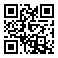

/content/drive/MyDrive/QRコード操作/qr_version/qr.v10.png


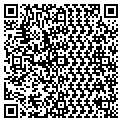

/content/drive/MyDrive/QRコード操作/qr_version/qr.v2.png


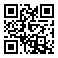

/content/drive/MyDrive/QRコード操作/qr_version/qr.v3.png


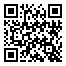

/content/drive/MyDrive/QRコード操作/qr_version/qr.v4.png


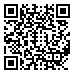

/content/drive/MyDrive/QRコード操作/qr_version/qr.v5.png


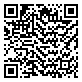

/content/drive/MyDrive/QRコード操作/qr_version/qr.v6.png


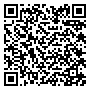

/content/drive/MyDrive/QRコード操作/qr_version/qr.v7.png


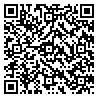

/content/drive/MyDrive/QRコード操作/qr_version/qr.v8.png


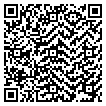

/content/drive/MyDrive/QRコード操作/qr_version/qr.v9.png


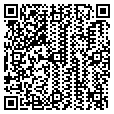

In [ ]:
# 生成したQRを表示
from pathlib import Path
png_list = sorted(Path(work_dir).glob("qr_version/qr.*.png"))
for png in png_list:
  print(png)
  display_png(disp_Image(png))